In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math 
import numpy as np
from tqdm import tqdm

## Twitter Sentiment Analysis Dataset

- Twitter is a goldmine for understanding public opinion in real-time.
- With the Twitter Sentiment Analysis Dataset, researchers can analyze the sentiment behind tweets, whether they're expressing joy about a recent event, frustration about a political decision, or anything in between.
- This dataset helps to gauge the overall sentiment of Twitter users on various topics.

Taken from: https://www.geeksforgeeks.org/nlp/dataset-for-sentiment-analysis/

In [2]:
df_twitter = pd.read_csv(
    'dataset/twitter/twitter_sentiment_analysis.csv', 
    header=0, 
    names=['cod', 'category', 'sentiment', 'text']
)
# drop na
df_twitter = df_twitter.dropna()

df_twitter.head()

,cod,category,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Number of tweets: 73996


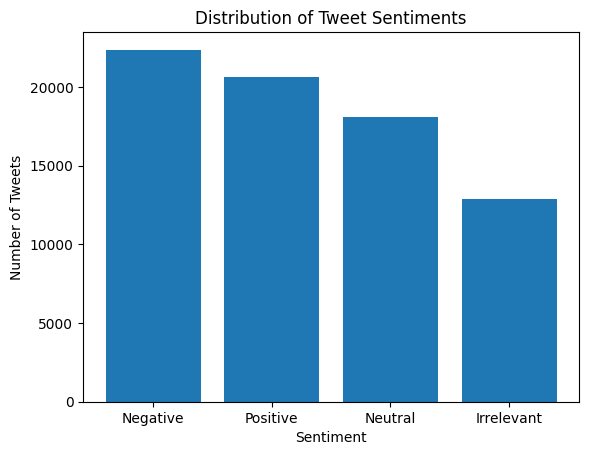

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


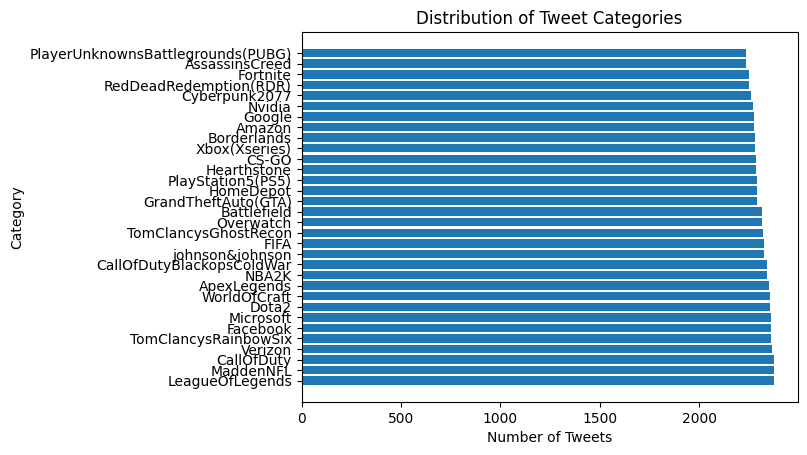

Checking for non-string entries...


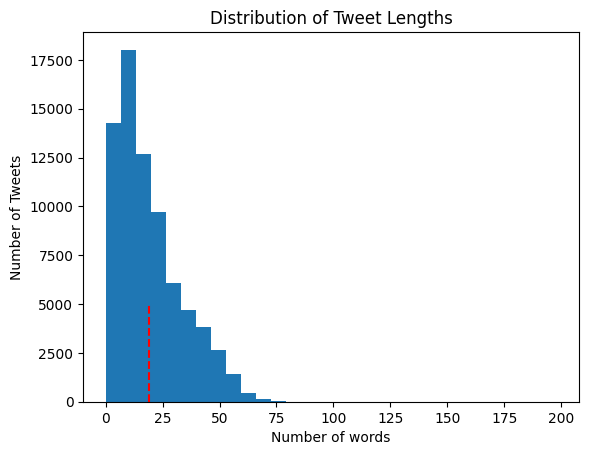

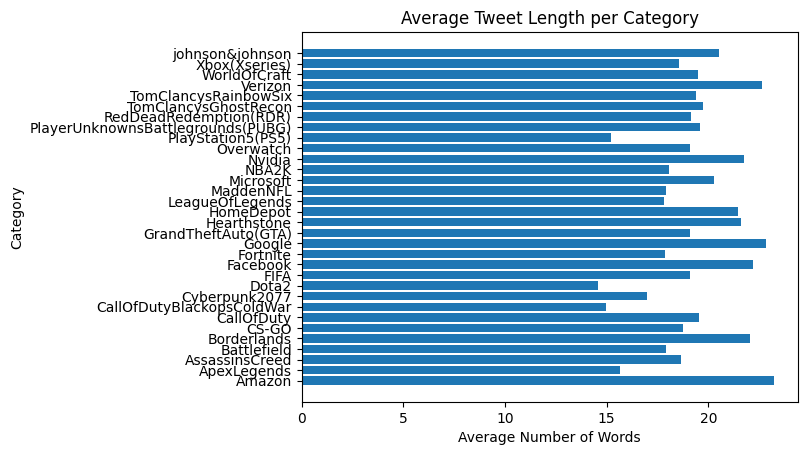

In [3]:
print("Number of tweets:", len(df_twitter))

sentiment_counts = df_twitter['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Sentiments')
plt.show()  

print(df_twitter['category'].unique())

# num sample per category horizontal bar plot
category_counts = df_twitter['category'].value_counts()
plt.barh(category_counts.index, category_counts.values)
plt.ylabel('Category')
plt.xlabel('Number of Tweets')
plt.title('Distribution of Tweet Categories')
plt.show()

print("Checking for non-string entries...")
for i, text in enumerate(df_twitter['text']):
    if not isinstance(text, str):
        print(f"Non-string entry at index {i}: {text}")


# calculating number of words in each tweet
df_twitter['nr_words'] = df_twitter['text'].apply(lambda x: len(x.split()))
plt.hist(df_twitter['nr_words'], bins=30)
plt.xlabel('Number of words')
plt.ylabel('Number of Tweets')
plt.vlines(df_twitter['nr_words'].mean(), 0, 5000, colors='r', linestyles='dashed', label='Mean')
plt.title('Distribution of Tweet Lengths')
plt.show()

# avg length per topic
avg_length_per_category = df_twitter.groupby('category')['nr_words'].mean()
plt.barh(avg_length_per_category.index, avg_length_per_category.values)
plt.ylabel('Category')
plt.xlabel('Average Number of Words')
plt.title('Average Tweet Length per Category')
plt.show()

In [7]:
print(df_twitter['cod'].unique())
print(len(df_twitter['cod'].unique()))

[2401 2402 2403 ... 9198 9199 9200]
12447


Number of tweets with at least 40 words: 8522


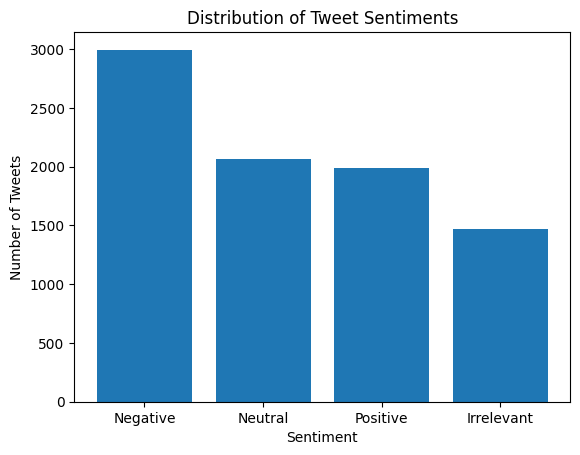

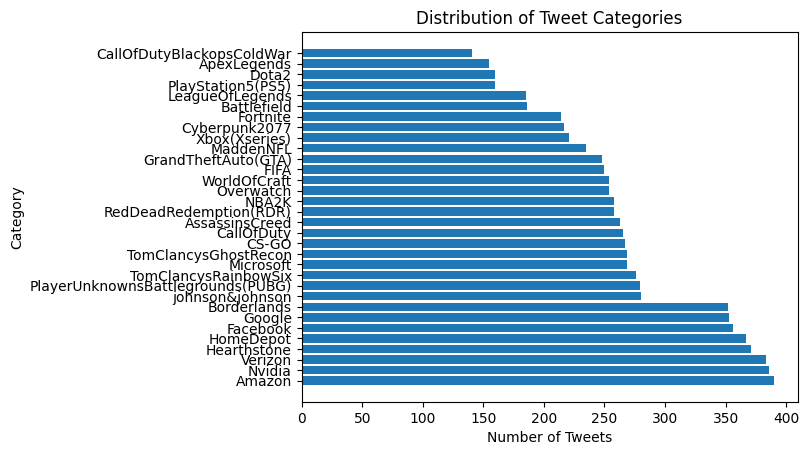

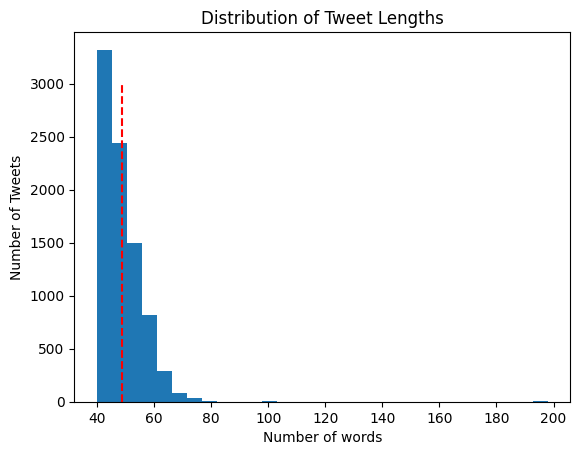

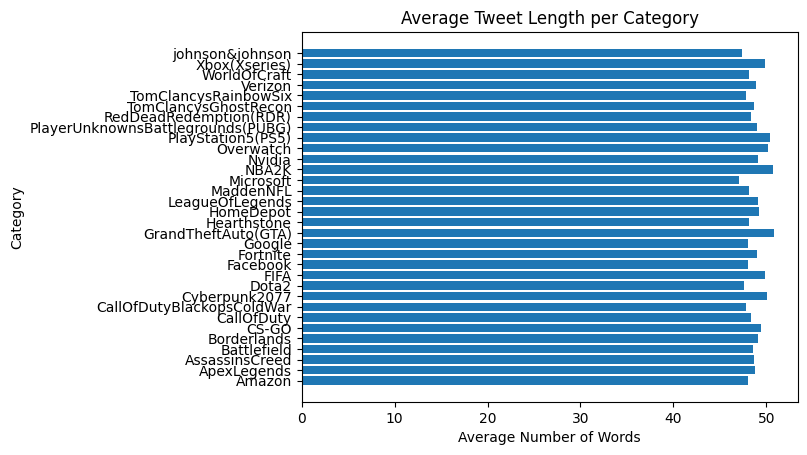

In [10]:
min_len = 40
a = df_twitter[df_twitter['nr_words'] >= min_len].copy()

print(f"Number of tweets with at least {min_len} words:", len(a))

sentiment_counts = a['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Sentiments')
plt.show()  

# num sample per category horizontal bar plot
category_counts = a['category'].value_counts()
plt.barh(category_counts.index, category_counts.values)
plt.ylabel('Category')
plt.xlabel('Number of Tweets')
plt.title('Distribution of Tweet Categories')
plt.show()

a['nr_words'] = a['text'].apply(lambda x: len(x.split()))
plt.hist(a['nr_words'], bins=30)
plt.xlabel('Number of words')
plt.ylabel('Number of Tweets')
plt.vlines(a['nr_words'].mean(), 0, 3000, colors='r', linestyles='dashed', label='Mean')
plt.title('Distribution of Tweet Lengths')
plt.show()

# avg length per topic
avg_length_per_category = a.groupby('category')['nr_words'].mean()
plt.barh(avg_length_per_category.index, avg_length_per_category.values)
plt.ylabel('Category')
plt.xlabel('Average Number of Words')
plt.title('Average Tweet Length per Category')
plt.show()

## Yelp Review Dataset

- Yelp is a go-to platform for people looking for recommendations on restaurants, hotels, and various services.
- The Yelp Reviews Dataset provides valuable insights into customer experiences and satisfaction levels.
- Businesses can use this dataset to monitor and improve their services based on feedback from customers.

Taken from: https://www.geeksforgeeks.org/nlp/dataset-for-sentiment-analysis/

Official website: https://business.yelp.com/data/resources/open-dataset/

In the following cells, we filter the row in order to select rows with a mean of 55 and std of 10 for the number of words in each review. Moreover, as done in the BESSTIE paper, we select reviews only with 2 and 4 stars.

Then use only the yelp_filtered_reviews.csv file

In [3]:
data_file = open("yelp_dataset/yelp_academic_dataset_review.json")
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)
data_file.close()

In [4]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
review_df['useful'].unique(), review_df['funny'].unique(), review_df['cool'].unique()

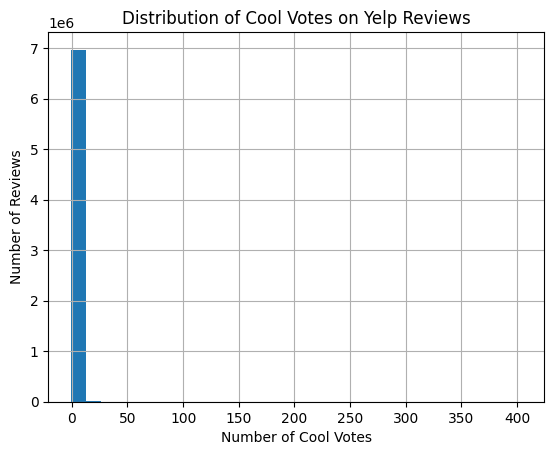

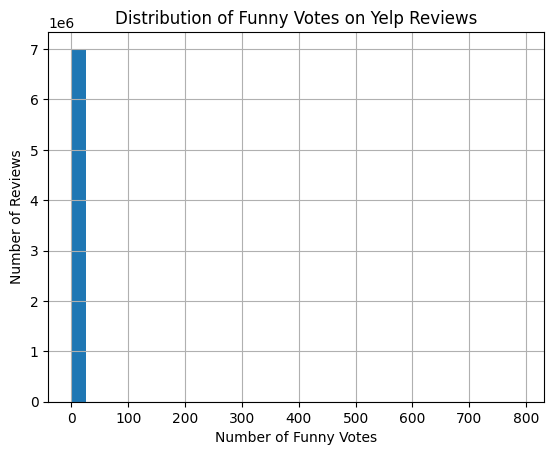

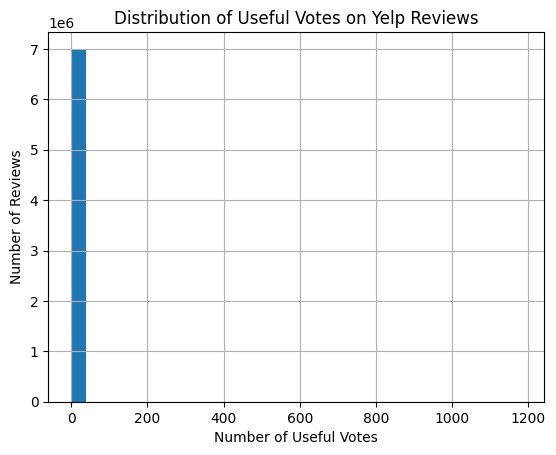

In [17]:
review_df['cool'].hist(bins=30)
plt.xlabel('Number of Cool Votes')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Cool Votes on Yelp Reviews')
plt.show()

review_df['funny'].hist(bins=30)
plt.xlabel('Number of Funny Votes')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Funny Votes on Yelp Reviews')   
plt.show()

review_df['useful'].hist(bins=30)
plt.xlabel('Number of Useful Votes')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Useful Votes on Yelp Reviews')
plt.show()

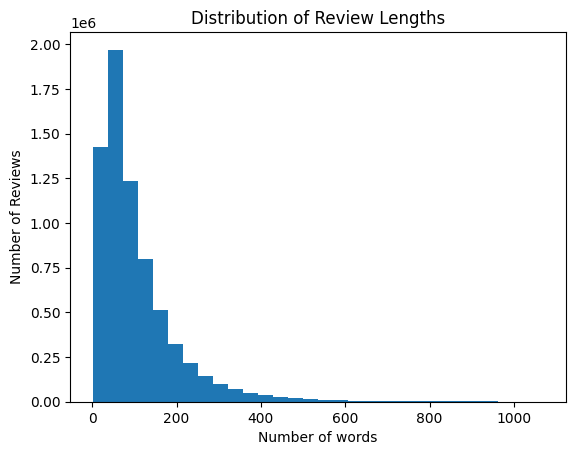

In [5]:
nr_words_yelp = [text.split().__len__() for text in review_df['text'].to_list()]
plt.hist(nr_words_yelp, bins=30)
plt.xlabel('Number of words')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

In [6]:
review_df['nr_words'] = nr_words_yelp

In [10]:
prob_to_keep = [math.exp(-(n-55)**2/200)/math.sqrt(200*math.pi) for n in nr_words_yelp]
index_list = []

pbar =tqdm()
for row in review_df.itertuples():
    pbar.update(1)
    if prob_to_keep[row.Index] > np.random.rand():
        index_list.append(row.Index)

6990280it [01:58, 58852.54it/s] 


In [13]:
columns_to_keep = ['stars', 'text', 'nr_words', 'useful', 'funny', 'cool']
pbar = tqdm()
filtered_review_data = []
for idx in index_list:
    pbar.update(1)
    filtered_review_data.append({col: review_df.iloc[idx][col] for col in columns_to_keep})
pbar.close()
filtered_review_df = pd.DataFrame(filtered_review_data)
filtered_review_df.head()

6990280it [02:36, 44744.24it/s] 
54592it [00:13, 4045.41it/s]


,stars,text,nr_words,useful,funny,cool
0,4.0,"Comfortable bed, good breakfast, fast internet...",41,0,0,0
1,5.0,Super tasty and enormous portions. Some unique...,26,0,0,0
2,5.0,Dr. Curtis Dechant has an excellent chair-side...,46,0,0,0
3,5.0,Love!! Our new favorite local spot. We've gone...,50,0,0,0
4,4.0,"Pros:\n\n-Superb cheeseburger - thick, evenly ...",58,0,0,0


In [16]:
filtered_review_df = filtered_review_df[(filtered_review_df['stars'] == 2) | (filtered_review_df['stars'] == 4)]
len(filtered_review_df)

14416

In [ ]:
filtered_review_df.to_csv('dataset/yelp/yelp_filtered_reviews.csv', index=False)

## Annotated dataset for sentiment analysis and sarcasm detection: Bilingual code-mixed English-Malay social media data

Taken from: https://www.sciencedirect.com/science/article/pii/S2352340924006309

In [21]:
annotated_bilingual_df = pd.read_csv('annotated_bicodemix_publicsa_v2.csv')

In [23]:
print(len(annotated_bilingual_df))
annotated_bilingual_df.head()

10000


,id,post/keyword,comment/tweet,username,like count,replied to,reply count,2nd level comment/ reply,time created,majority_sent,majority_sarc,lang_id
0,28987,Taiping Perak Banjir 28/08/2022 #azrulazim352 ...,sius la awk..bnjir sana..kwn xckp ape pon??,33d2a31d-c13,1,---,1,No,29/8/2022,neutral,notsarc,my
1,28988,Taiping Perak Banjir 28/08/2022 #azrulazim352 ...,"srikota, taman sg mas, air kuning semua banjir...",61957789-224,0,33d2a31d-c13,---,Yes,29/8/2022,neutral,notsarc,my
2,28989,Taiping Perak Banjir 28/08/2022 #azrulazim352 ...,massyaallah.. . dasyatnya bnjir kali nie kawan...,cffa43d1-936,2,---,1,No,29/8/2022,negative,notsarc,my
3,28990,banjir simpang 4 benoni #banjir2022 Publish: 1...,Simpang p papar kan?,c3128b6f-2e5,2,---,0,No,2d ago,neutral,notsarc,my
4,28991,banjir simpang 4 benoni #banjir2022 Publish: 1...,nasib baik lah sempat limpas,813bbc92-ca2,1,---,0,No,2d ago,positive,notsarc,my


In [25]:
# nr of comments in english
annotated_bilingual_en_df = annotated_bilingual_df[annotated_bilingual_df['lang_id'] == 'en']
len(annotated_bilingual_en_df)

1009

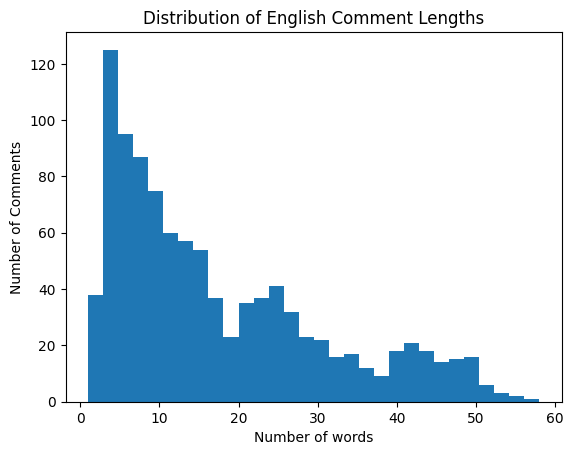

In [27]:
nr_words_en = [text.split().__len__() for text in annotated_bilingual_en_df['comment/tweet'].to_list()]
plt.hist(nr_words_en, bins=30)
plt.xlabel('Number of words')
plt.ylabel('Number of Comments')    
plt.title('Distribution of English Comment Lengths')
plt.show()